In [8]:
import seaborn as sns
import pandas as pd
from os.path import exists
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pylab as pylab

#from mycolorpy import colorlist as mcp

from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

import scipy as scipy
from scipy import optimize

from soursop.sstrajectory import SSTrajectory
import mdtraj as md

import csv

# define this so we can read in nucleotides
NA_EXTENSION = ['D5P', 'DPC',  'DPU',  'DPT',  'DPA',  'DPG',  'R5P',  'RPC' , 'RPU',  'RPT',  'RPA',  'RPG']

# molecular weight of N protein (g/mol)
MW_N = 18850
M2nM=1e9

# importing mean()
from statistics import mean
  
def Average(lst):
    return mean(lst)

import numpy as np

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['legend.fontsize'] = 6

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [9]:
import pandas as pd
import glob
import os

pd.set_option('precision', 9)

path = r'./Analysis/Data/' # use your path
all_files = glob.glob(os.path.join(path , "*Ka.csv"))

Total = []

df = pd.concat((pd.read_csv(f) for f in all_files), axis = 1)

df = df.reindex(sorted(df.columns), axis=1)

df

,11_RBD_1_10_Ka,11_RBD_1_11_Ka,11_RBD_1_12_Ka,11_RBD_1_13_Ka,11_RBD_1_14_Ka,11_RBD_1_15_Ka,11_RBD_1_1_Ka,11_RBD_1_2_Ka,11_RBD_1_3_Ka,11_RBD_1_4_Ka,...,WT_RBD_5_15_Ka,WT_RBD_5_1_Ka,WT_RBD_5_2_Ka,WT_RBD_5_3_Ka,WT_RBD_5_4_Ka,WT_RBD_5_5_Ka,WT_RBD_5_6_Ka,WT_RBD_5_7_Ka,WT_RBD_5_8_Ka,WT_RBD_5_9_Ka
0,0.000433301,0.000053383,0.000182767,0.00005135,0.000053631,0.000076563,0.000025425,0.000047106,0.000104807,0.000027809,...,0.000129382,0.000107911,0.000089704,0.000835229,0.000198175,0.000075495,0.000200334,0.000310444,0.000030199,0.000083423


In [10]:
df_melted = pd.melt(df)
df_structured = df_melted.join(df_melted['variable'].str.split('_', 3, expand=True).rename(columns={0:'NTD', 1:'RBD', 2:'Replicate', 3:'Ka'}))
df_structured = df_structured.rename(columns = {"Ka": "Blank", "value": "Ka"})
df_structured.head(20)

,variable,Ka,NTD,RBD,Replicate,Blank
0,11_RBD_1_10_Ka,0.000433301,11,RBD,1,10_Ka
1,11_RBD_1_11_Ka,0.000053383,11,RBD,1,11_Ka
2,11_RBD_1_12_Ka,0.000182767,11,RBD,1,12_Ka
3,11_RBD_1_13_Ka,0.000051350,11,RBD,1,13_Ka
4,11_RBD_1_14_Ka,0.000053631,11,RBD,1,14_Ka
5,11_RBD_1_15_Ka,0.000076563,11,RBD,1,15_Ka
6,11_RBD_1_1_Ka,0.000025425,11,RBD,1,1_Ka
7,11_RBD_1_2_Ka,0.000047106,11,RBD,1,2_Ka
8,11_RBD_1_3_Ka,0.000104807,11,RBD,1,3_Ka
9,11_RBD_1_4_Ka,0.000027809,11,RBD,1,4_Ka


In [4]:
# Generating a new column 'Ka*' which is the 'value' column divided by the mean of values where NTD is equal to 'SCO2'
df_structured['Ka*'] = df_structured['Ka'] / df_structured[df_structured['NTD'] == 'WT']['Ka'].mean()

In [5]:
# Define the mapping dictionary
mapping = {
    '1':  "MRSGARSKQRRSDNGPQNQRNAPRITFGGPSDSTGSNQNGEPQGLPNNT",
    '6':  "MSDNGPRSGARSKQRRQNQRNAPRITFGGPSDSTGSNQNGEPQGLPNNT",
    '11': "MSDNGPQNQRNRSGARSKQRRAPRITFGGPSDSTGSNQNGEPQGLPNNT",
    '16': "MSDNGPQNQRNAPRITRSGARSKQRRFGGPSDSTGSNQNGEPQGLPNNT",
    '21': "MSDNGPQNQRNAPRITFGGPSRSGARSKQRRDSTGSNQNGEPQGLPNNT",
    '26': "MSDNGPQNQRNAPRITFGGPSDSTGSRSGARSKQRRNQNGEPQGLPNNT",
    "WT": "MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLPNNT"
}

# Add a new column based on the mapping
df_structured["Sequences"] = df_structured["NTD"].apply(lambda x: mapping.get(str(x), ""))

# Print the updated dataframe
df_structured

,variable,Ka,NTD,RBD,Replicate,Blank,Ka*,Sequences
0,11_RBD_1_10_Ka,0.000433301,11,RBD,1,10_Ka,2.079187215,MSDNGPQNQRNRSGARSKQRRAPRITFGGPSDSTGSNQNGEPQGLPNNT
1,11_RBD_1_11_Ka,0.000053383,11,RBD,1,11_Ka,0.256159114,MSDNGPQNQRNRSGARSKQRRAPRITFGGPSDSTGSNQNGEPQGLPNNT
2,11_RBD_1_12_Ka,0.000182767,11,RBD,1,12_Ka,0.877003031,MSDNGPQNQRNRSGARSKQRRAPRITFGGPSDSTGSNQNGEPQGLPNNT
3,11_RBD_1_13_Ka,0.000051350,11,RBD,1,13_Ka,0.246403960,MSDNGPQNQRNRSGARSKQRRAPRITFGGPSDSTGSNQNGEPQGLPNNT
4,11_RBD_1_14_Ka,0.000053631,11,RBD,1,14_Ka,0.257344942,MSDNGPQNQRNRSGARSKQRRAPRITFGGPSDSTGSNQNGEPQGLPNNT
...,...,...,...,...,...,...,...,...
520,WT_RBD_5_5_Ka,0.000075495,WT,RBD,5,5_Ka,0.362261888,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLPNNT
521,WT_RBD_5_6_Ka,0.000200334,WT,RBD,5,6_Ka,0.961297801,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLPNNT
522,WT_RBD_5_7_Ka,0.000310444,WT,RBD,5,7_Ka,1.489659346,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLPNNT
523,WT_RBD_5_8_Ka,0.000030199,WT,RBD,5,8_Ka,0.144907572,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLPNNT


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

26 v.s. WT: t-test independent samples with Bonferroni correction, P_val=2.713e-03 stat=-3.588e+00
21 v.s. WT: t-test independent samples with Bonferroni correction, P_val=9.418e-07 stat=-5.508e+00
16 v.s. WT: t-test independent samples with Bonferroni correction, P_val=7.327e-03 stat=-3.298e+00
11 v.s. WT: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=5.027e-01
6 v.s. WT: t-test independent samples with Bonferroni correction, P_val=1.681e-01 stat=-2.219e+00
1 v.s. WT: t-test independent samples with Bonferroni correction, P_val=9.903e-08 stat=-5.974e+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f24a78bbac8>,
  <statannot.StatResult.StatResult at 0x7f24a14a3240>])

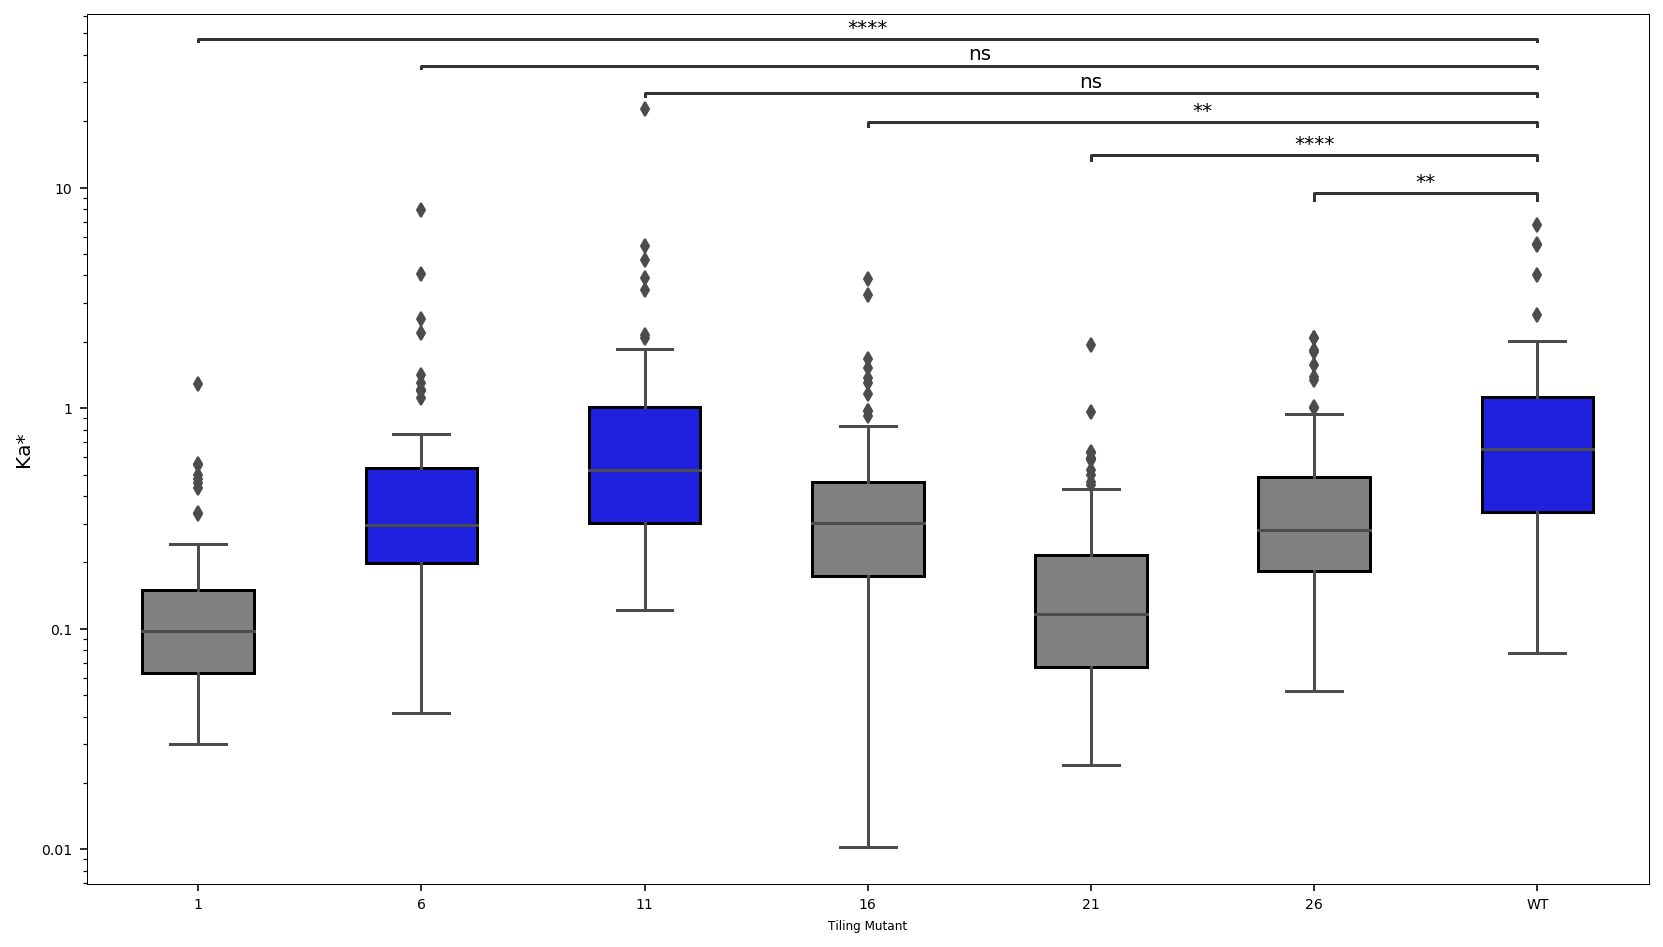

In [6]:
from statannot import add_stat_annotation

fig, ax = plt.subplots(1,1, figsize=(14,8))
ax.set_yscale('log')

ax.set_yticks([10, 1, 0.1, 0.01, 0.001])
ax.set_yticklabels(['10', '1', '0.1', '0.01', '0.001'])


# Define the colors for the specific strings
#specific_colors = {'NTD': 'r', 'RBD': 'blue', 'WT': 'purple'}

# Define the default color for other values
PROPS = {
    'boxprops':{'edgecolor':'black'}}

df = df_structured
x = "NTD"
y = "Ka*"
#order = df_structured.groupby('NTD')['Ka'].agg('mean').sort_values(ascending=False).index
#my_pal = {species: "red" if species == "6" else "black" for species in df.NTD.unique()}

custom_palette = ['grey', 'blue', 'blue', 'grey', 'grey', 'grey', 'blue']

custom_order = ['WT', '11', '6', '16', '26', '21', '1', ]
custom_order = ['1', '6', '11', '16', '21', '26', 'WT', ]
ax = sns.boxplot(data=df, x=x, y=y, order=custom_order,palette = custom_palette, width = .5, dodge = False, **PROPS)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=custom_order,
                                   box_pairs=[("WT","11"),("WT","16"),("WT","6"),
                                             ("WT", "26"), ("WT","21"),("WT","1")],
                                   test='t-test_ind', text_format='star',
                                   verbose=2)

plt.legend([],[], frameon=False)



plt.xlabel('Tiling Mutant', fontsize=6);
plt.tick_params(axis='both', which='major', labelsize=7)

#fig.savefig(f'./Analysis/Plots/Position_box_plot.png', format='png')
#fig.savefig(f'/./Analysis/Plots/Position_box_plot.pdf', format='pdf', dpi = 800)
#plt.ylim(0, 0.002)
#plt.yscale('log')
test_results